# Trabalho de termodinâmica - Exercício 4 - Prof. Woiski

## Dicentes
$\rightarrow$ Umberto Boranga   RA:  182054926 \
$\rightarrow$ Arthur Chabole    RA:  182054861  \
$\rightarrow$ Cleiton Pereira   RA:  182054421  \
$\rightarrow$ Rebeca Faustino Casado RA: 182055388

<font size="4">
4- Uma usina a vapor opera em um ciclo de Rankine com reaquecimento ideal e regenerativo e tem
uma potência líquida de 80 MW. O vapor entra na turbina de alta pressão a 10 MPa e 550 ° C e sai a
0,8 MPa. Parte do vapor é extraído a essa pressão para aquecer a água de alimentação em um
aquecedor de água de alimentação aberto (de mistura). O restante do vapor é reaquecido na caldeira
a 500 ° C e é expandido na turbina de baixa pressão para a pressão do condensador de 10 kPa.
Mostre o ciclo em um diagrama Ts em relação às linhas de saturação e determine (a) a vazão de
massa do vapor através da caldeira e (b) a eficiência térmica do ciclo.
</font>

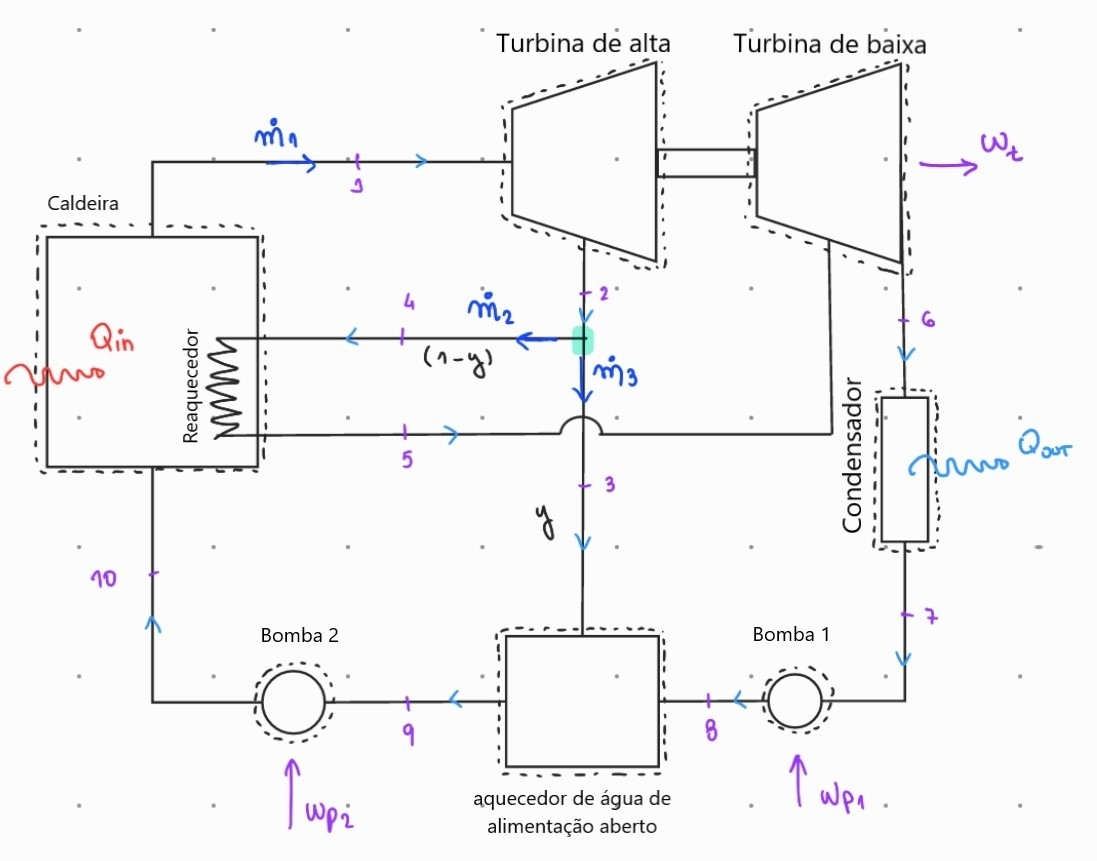

## Considerações
$\rightarrow$ Ciclo ideal e fechado\
$\rightarrow$ Regime permanente\
$\rightarrow$ Todos os processos do fluido de trabalho são internamente reversíveis\
$\rightarrow$ Turbinas, bombas e aquecedor de água de alimentação aberto opera adiabaticamente\
$\rightarrow$ Energia cinética e potêncial desprezadas\
$\rightarrow$ Saida do condensador e do aquecedor de água de alimentação aberto é líquido saturado

## Dados

<font size="3.7">  

$$P_{1}=10Mpa, T_{1}=550°C \\
T_{5}=500°C,P_{6}=10Kpa\\
\dot{\omega_{c}}=80MW
$$
<f/> 

### Vazão de massa pela bifurcação

<font size="4">    

$$\frac{\dot{m_{2}}}{\dot{m_{1}}}+\frac{\dot{m_{3}}}{\dot{m_{1}}}=1 \\
\frac{\dot{m_{2}}}{\dot{m_{1}}}=1-y \rightarrow  \frac{\dot{m_{3}}}{\dot{m_{1}}}= y \\
$$
<f/>        

### 1 lei para o aquecedor de água al aberto
$
$

<font size="3">
$$0=(1-y)h_{8}(P_{2})+yh_{3}(T_{2},P_{2})-h_{9}(P_{2},x_{9})$$
    $
    $
$$y=\frac{h_{9}(P_{2},x_{9})-h_{8}(P_{2})}{h_{3}(P_{2},T_{2})-h_{8}(P_{2})}$$
<f/>

### Primeira lei aplicada as turbinas, bombas, caldeira e reaquecimento
$
$
<font size="3"> 
$$\frac{\dot{\omega }_{t}}{\dot{m }_{1}} = (h_{1}(P_{1},T_{1})-h_{2}(P_{2}))+(1-y)(h_{5}(T_{4},P_{2})-h_{6}(P_{6})) \\
\frac{\dot{\omega }_{p}}{\dot{m }_{1}} = (h_{9}(P_{2},x_{9})-h_{10}(P_{1}))+(1-y)(h_{7}(P_{6},x_{7})-h_{8}(P_{2})) \\
\frac{\dot{Q}_{in}}{\dot{m }_{1}} = (h_{1}(P_{1},T_{1})-h_{10}(P_{1}))+(1-y)(h_{5}(P_{2},T_{4})-h_{4}(P_{2},T_{2}))$$
<f/>    

### Eficiência do ciclo
<font size="5">    
$$\eta = \frac{\frac{\dot{\omega }_{t}}{\dot{m }_{1}} - \frac{\dot{\omega }_{p}}{\dot{m }_{1}}}{\frac{\dot{Q }_{in}}{\dot{m }_{1}}}$$
<f/>

### Potência do últil do ciclo 
<font size="4.5">
$$\dot{\omega_{c}} = \dot{\omega_{t}} - \dot{\omega_{p}}=80$$


<f/>

### Vazão de massa pela caldeira $\dot{m_{1}}$
<font size="4.5">

$$\dot{m_{1}} = \frac{1000\cdot \dot{\omega_{c}}}{\omega _{t}-\omega _{p}}$$
<f/>

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from LK_proptermo import *

In [34]:
sub = Substance('water') #Fluido de trabalho
b_sub = Base(sub,Tb=300,Pb=1)

Path absoluto da tabela:  C:\Users\arthu\tabelaA1A3.db


### Dados (inputs)

In [35]:
T1,T4 = 550+273,500+273 #K
P1,P2,P6 = 10,0.8,0.01  #Mpa
Wc_dot= 80 #MW

In [36]:
e1 = State(sub, b_sub, T=T1,P=P1)

### Assumindo turbina 1 e bifurcação da vazão das massas estados 2, 3 e 4

In [45]:
def residuo(T2,args):
    
    e2 = State(sub,b_sub,T=T2,P=P2)
    return np.array((
        e2.s - e1.s
    ))

T2,ite,res = robustNewton(residuo,(500)) #500 chute inicial

# Assumindo que na bifurcação não há alteração das propriedades termodinâmicas dos estados 2,3 e 4
e2 = State(sub,b_sub,T=T2,P=P2)
e3 = State(sub,b_sub,T=T2,P=P2)
e4 = State(sub,b_sub,T=T2,P=P2)

### Definindo estado 5 na saída do reaquecedor e estado 6 na saída na turbina 2

In [46]:
e5 = State(sub, b_sub, T=T4, P=P2) #Assumindo P=cte, p2=p3
e6 = auxiliar(sub, b_sub,'s',e5.s, P=P6 ) #Assumindo turb2 isentropica, descobrindo titulo x6


### Definindo estado 7 na saída do condensador considerando líquido saturado

In [ ]:
e7 = State(sub, b_sub, P=P6, x=0) # P=cte (P6=P7) no condensador e saida liquido saturado x=0

### Definindo o estado 8 pela bomba considerando volume específico constante do estado 7 para o 8

In [76]:
v8= e7.v
e8 = auxiliar(sub, b_sub,'v',v8, P=P2 ) #Estado 8 após passar pela bomba isentrópica e P8=P2

319.7580946610029 3 2.6472243234293424e-11


### Definindo o estado 9 e 10 considerando saida do aquecedor de água líquido saturado

In [48]:
e9 = State(sub, b_sub, P=P2, x=0 ) #Passando pelo fonte aberta liquido sat e P9=P2
e10 = auxiliar(sub, b_sub,'s',e9.s, P=P1 ) #Bomba isentrópica e P10=P1

444.7073930094118 4 -9.427347791302054e-11


### Vazão de massa pela bifurcação

In [83]:
#Vazão de massa m1, m2, m3
y = (e9.h-e8.h)/(e3.h-e8.h)
#m2 + m3 = m1 ->> m2/m1 + m3/m1 = 1 ->> m2/m1 = 1-y
y

0.20076258611327555

### Fluxo de energia/kg na turbina, bomba e caldeira

In [51]:
#fluxos energia e trabalho por unidade de massa
Wt_dot = (e1.h-e2.h)+(1-y)*(e5.h-e6.h)     
Wp_dot = (e9.h-e10.h)+(1-y)*(e7.h-e8.h)
Qin_dot = (e1.h-e10.h)+(1-y)*(e5.h-e4.h)   
Wt_dot,Wp_dot,Qin_dot                    #kJ/Kg

(1477.7431210098398, -13.423112229614286, 3304.7416069228057)

### Eficiência do ciclo

In [85]:
#Eficiência do ciclo
n = (Wt_dot-Wp_dot)/Qin_dot
n*100 

45.12202194918187

### Vazão de massa  $ \dot{m_{1}}$ kg/s

In [86]:
#Vazão de massa kg/s Wciclo= 80MW, Wc = Wt + Wp (potencia)
m1_dot = Wc_dot*100/(Wt_dot-Wp_dot) # Kg/s
m1_dot

5.36492835049018

### Outputs

In [87]:
print(f'a) A vazão de massa pela caldeira é {m1_dot:.2} Kg/s' )
print(f'b) A eficiência do ciclo é {n:2.2%}')


a) A vazão de massa pela caldeira é 5.4 Kg/s
b) A eficiência do ciclo é 45.12%


### Construindo o diagrama Ts

não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu com 7000 iterações!
não convergiu 

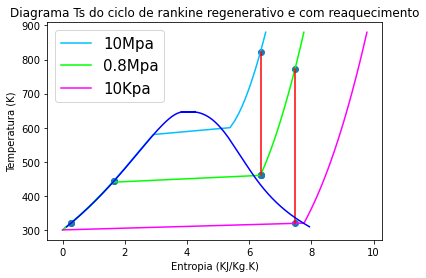

In [80]:
#OBS:Esta célula demora cerca de 5min para ser executada por isso será adicionada uma imagem em .png do diagrama Ts na 
#                                                                     célula abaixo para facilitar a correção do trabalho.
# Vetor de tempera e entropia
x=[e1.s,e2.s,e3.s,e4.s,e5.s,e6.s,e7.s,e8.s,e9.s,e10.s]
y=[e1.T,e2.T,e3.T,e4.T,e5.T,e6.T,e7.T,e8.T,e9.T,e10.T]

#Função para gerar o domo de vapor
def domo_vapor (P):
    T_Lsat, S_Lsat, T_Vsat,S_Vsat = [],[],[],[]
    for i in range (len(P)):  
        e = State(sub, b_sub, P=P[i], x=0)
        T_Lsat.append(e.T)
        S_Lsat.append(e.s)
        e = State(sub, b_sub, P=P[i], x=1)
        T_Vsat.append(e.T)
        S_Vsat.append(e.s)
    return T_Lsat, S_Lsat, T_Vsat,S_Vsat

#Função para gerar as isobáricas
def diagram_ts(P):
    x,y,=[],[]
    for i in range(300,900,20):
        S = State(sub, b_sub, T=i, P=P )
        x.append(S.s)
        y.append(i)
    return x,y

#Gerando vetor de pressão
P=[]
i=0.001
while True:
    if i>=22:
        break          
    i+=0.005
    P.append(i)

# Gerando dados do domo de vapor e isobáricas
T_Lsat, S_Lsat, T_Vsat,S_Vsat = domo_vapor(P)
x1,y1 = diagram_ts(10)
x2,y2 = diagram_ts(.8)
x3,y3 = diagram_ts(.01)

# Gerando os dados da curva isentropicas do diagrama Ts
#Turbinas 1 e 2
s12 = [e1.s,e2.s]
t12 = [e1.T,e2.T]

s56 = [e5.s,e6.s]
t56 = [e5.T,e6.T]

#Bombas 1 e 2
s78 =[ e7.s,e8.s]
t78 = [e7.T,e8.T]

s910 = [e9.s,e10.s]
t910 = [e9.T,e10.T]

#Plotando dos dados e formatando
fig, ax = plt.subplots()

#Isobaricas
line1 = ax.plot(x1,y1, color='deepskyblue', label='10Mpa')
line2 = ax.plot(x2,y2, color='lime', label='0.8Mpa' )
line3 = ax.plot(x3,y3, color='magenta', label='10Kpa' )

#Isentrópicas da turbina 1 e turbina 2
Isen12 = ax.plot(s12,t12, color='red' )
Isen56 = ax.plot(s56,t56, color='red' )

#Isentrópricas bombas 1 e 2
Isen78 = ax.plot(s78,t78, color='red' )
Isen910 = ax.plot(s910,t910, color='red' )

#Pontos do diagrama e Domo de vapor 
line_lsat = ax.scatter(x,y)
line_lsat = ax.plot(S_Lsat,T_Lsat, color='blue')
line_vsat = ax.plot(S_Vsat,T_Lsat, color='blue')

#Formatando o gráfico
ax.set(xlabel='Entropia (KJ/Kg.K)', ylabel='Temperatura (K)',
       title='Diagrama Ts do ciclo de rankine regenerativo e com reaquecimento')

plt.legend(prop={'size':15})
plt.show()
     

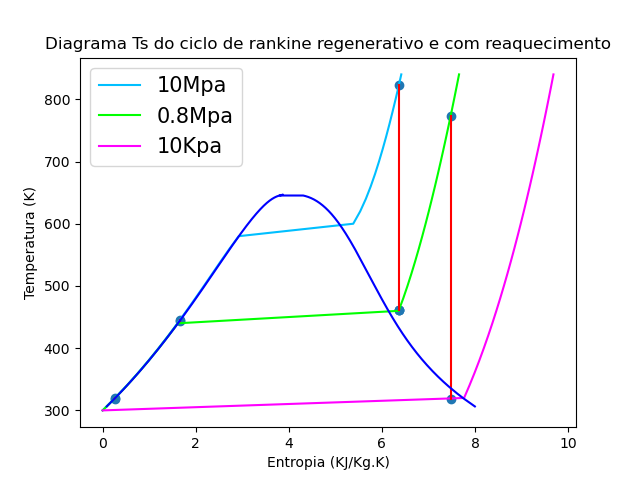

In [81]:
e1.s,e2.s,e3.s,e4.s,e5.s,e6.s,e7.s,e8.s,e9.s,e10.s


(6.364831318162988,
 6.364831323239841,
 6.364831323239841,
 6.364831323239841,
 7.475768886749584,
 7.475768886749584,
 0.2562465377767167,
 0.26636630583713056,
 1.6529754972125037,
 1.6529754973067772)

In [82]:
e1.T,e2.T,e3.T,e4.T,e5.T,e6.T,e7.T,e8.T,e9.T,e10.T

(823.0,
 461.0662711100326,
 461.0662711100326,
 461.0662711100326,
 773.0,
 318.9576700745236,
 318.9576700745236,
 319.7580946610029,
 443.52496067598565,
 444.7073930094118)